In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.00000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.)+1j*random.uniform(-5., 5.))
x.append(x[0])

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    print(resultado)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.)+1j*random.uniform(-5., 5.))
    x.append(x[0])
    
    u = [[0, resultado[1][0]],[np.conj(resultado[1][0]), 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    

iteracao:  1
(101, array([-2.06189689+0.38204321j, -1.92854521+0.38204321j]), 'Numero de iteracoes')
iteracao:  2
(101, array([4.83986213+0.7249119j, 4.97390183+0.7249119j]), 'Numero de iteracoes')
iteracao:  3
(101, array([1.57292295-2.72661946j, 1.7031429 -2.72661946j]), 'Numero de iteracoes')
iteracao:  4
(101, array([2.11834031+4.96419921j, 2.25564834+4.96419921j]), 'Numero de iteracoes')
iteracao:  5
(101, array([-3.70690324+1.35070241j, -3.70690324+1.35070241j]), 'Numero de iteracoes')
iteracao:  6
(1, array([-4.75833251+4.19908085j, -4.75833251+4.19908085j]), 'Erro x')
iteracao:  7
(101, array([1.56997328+3.16356245j, 1.56997328+3.16356245j]), 'Numero de iteracoes')
iteracao:  8
(101, array([1.90904208+2.67279908j, 1.90904208+2.67279908j]), 'Numero de iteracoes')
iteracao:  9
(101, array([-2.10893971-1.64810605j, -2.10893971-1.64810605j]), 'Numero de iteracoes')
iteracao:  10
(101, array([2.06784873+1.64850056j, 2.06784873+1.64850056j]), 'Numero de iteracoes')
iteracao:  11
(101

(101, array([1.30944684+1.8206082j, 1.30944684+1.8206082j]), 'Numero de iteracoes')
iteracao:  86
(1, array([0.88420508-3.26678922j, 0.88420508-3.26678922j]), 'Erro x')
iteracao:  87
(101, array([-1.78690831+4.55338166j, -1.78690831+4.55338166j]), 'Numero de iteracoes')
iteracao:  88
(1, array([2.45067744+1.55294848j, 2.45067744+1.55294848j]), 'Erro x')
iteracao:  89
(1, array([2.86336901-3.77027621j, 2.86336901-3.77027621j]), 'Erro x')
iteracao:  90
(1, array([3.82951958+1.27542278j, 3.82951958+1.27542278j]), 'Erro x')
iteracao:  91
(1, array([4.66144607-4.14046889j, 4.66144607-4.14046889j]), 'Erro x')
iteracao:  92
(1, array([-3.23990053+1.11349234j, -3.23990053+1.11349234j]), 'Erro x')
iteracao:  93
(1, array([-0.0025671-1.46477645j, -0.0025671-1.46477645j]), 'Erro x')
iteracao:  94
(1, array([-2.85028719-0.28930206j, -2.85028719-0.28930206j]), 'Erro x')
iteracao:  95
(1, array([-2.53902264-4.0645828j, -2.53902264-4.0645828j]), 'Erro x')
iteracao:  96
(101, array([2.62426869-4.03291

(101, array([-1.34198267+1.81850299j, -1.42996788+1.81850299j]), 'Numero de iteracoes')
iteracao:  170
(101, array([3.12824441-4.29085162j, 3.03841138-4.29085162j]), 'Numero de iteracoes')
iteracao:  171
(101, array([3.76729993+0.33037744j, 3.66943754+0.33037744j]), 'Numero de iteracoes')
iteracao:  172
(101, array([-5.90822395-3.19524855j, -5.99929114-3.19524855j]), 'Numero de iteracoes')
iteracao:  173
(101, array([-1.03723637+4.32477215j, -1.13408559+4.32477215j]), 'Numero de iteracoes')
iteracao:  174
(101, array([1.468086  +3.02507506j, 1.36779007+3.02507506j]), 'Numero de iteracoes')
iteracao:  175
(101, array([-3.00767082+2.06394301j, -3.10683138+2.06394301j]), 'Numero de iteracoes')
iteracao:  176
(101, array([2.297372  -3.40440384j, 2.19840183-3.40440384j]), 'Numero de iteracoes')
iteracao:  177
(101, array([1.96650698-4.60851811j, 1.86685229-4.60851811j]), 'Numero de iteracoes')
iteracao:  178
(101, array([-5.37407891+1.51593597j, -5.47422993+1.51593597j]), 'Numero de iteraco

(101, array([3.5672676-1.70841732j, 3.5672676-1.70841732j]), 'Numero de iteracoes')
iteracao:  251
(101, array([3.89071201+4.64285112j, 3.89071201+4.64285112j]), 'Numero de iteracoes')
iteracao:  252
(101, array([1.8812642+0.65072697j, 1.8812642+0.65072697j]), 'Numero de iteracoes')
iteracao:  253
(101, array([1.19999228-2.35130238j, 1.19999228-2.35130238j]), 'Numero de iteracoes')
iteracao:  254
(101, array([-3.16548659+0.57892076j, -3.16548659+0.57892076j]), 'Numero de iteracoes')
iteracao:  255
(101, array([-4.4310732+3.86664841j, -4.4310732+3.86664841j]), 'Numero de iteracoes')
iteracao:  256
(101, array([2.4322997-3.49176765j, 2.4322997-3.49176765j]), 'Numero de iteracoes')
iteracao:  257
(101, array([4.78896072-1.74607243j, 4.78896072-1.74607243j]), 'Numero de iteracoes')
iteracao:  258
(101, array([2.26982501+3.81172451j, 2.26982502+3.81172451j]), 'Numero de iteracoes')
iteracao:  259
(101, array([-1.16666153+1.77963936j, -1.16666153+1.77963936j]), 'Numero de iteracoes')
iteraca

(101, array([1.67550459+2.85774579j, 1.67550459+2.85774579j]), 'Numero de iteracoes')
iteracao:  332
(101, array([-3.99409345-0.68131503j, -3.99409345-0.68131503j]), 'Numero de iteracoes')
iteracao:  333
(1, array([-1.27553709+2.5299254j, -1.27553709+2.5299254j]), 'Erro x')
iteracao:  334
(1, array([-0.41713797-3.87308339j, -0.41713797-3.87308339j]), 'Erro x')
iteracao:  335
(1, array([-1.81147909+4.51697589j, -1.81147909+4.51697589j]), 'Erro x')
iteracao:  336
(101, array([2.59279725-1.2758219j, 2.55666354-1.2758219j]), 'Numero de iteracoes')
iteracao:  337
(101, array([3.18774429-3.95846917j, 3.15739764-3.95846917j]), 'Numero de iteracoes')
iteracao:  338
(101, array([-3.99772718-0.67264429j, -4.02768457-0.67264429j]), 'Numero de iteracoes')
iteracao:  339
(101, array([-4.79653566+2.8269581j, -4.83104189+2.8269581j]), 'Numero de iteracoes')
iteracao:  340
(101, array([0.63202079+3.54315222j, 0.59332808+3.54315222j]), 'Numero de iteracoes')
iteracao:  341
(101, array([-1.44847868+4.74

(101, array([3.45400151+2.13791876j, 3.52149004+2.13791876j]), 'Numero de iteracoes')
iteracao:  414
(101, array([-4.8391823 -0.49461143j, -4.77022838-0.49461143j]), 'Numero de iteracoes')
iteracao:  415
(101, array([-1.13090266+0.42381633j, -1.06222433+0.42381633j]), 'Numero de iteracoes')
iteracao:  416
(101, array([-3.86133589+2.36833648j, -3.78858037+2.36833648j]), 'Numero de iteracoes')
iteracao:  417
(101, array([-2.50311225+1.79108615j, -2.42877383+1.79108615j]), 'Numero de iteracoes')
iteracao:  418
(101, array([-5.70530996+4.39590349j, -5.62348715+4.39590349j]), 'Numero de iteracoes')
iteracao:  419
(101, array([-1.41255841-2.04677933j, -1.33479744-2.04677933j]), 'Numero de iteracoes')
iteracao:  420
(101, array([0.3346153 +0.47487098j, 0.41111211+0.47487098j]), 'Numero de iteracoes')
iteracao:  421
(101, array([0.28536638-4.80712885j, 0.35534032-4.80712885j]), 'Numero de iteracoes')
iteracao:  422
(101, array([2.92446663+3.111275j, 2.99291806+3.111275j]), 'Numero de iteracoes

(101, array([4.19145738+3.86918352j, 4.18665001+3.86918352j]), 'Numero de iteracoes')
iteracao:  496
(101, array([-3.47947074-0.89741801j, -3.48610865-0.89741801j]), 'Numero de iteracoes')
iteracao:  497
(101, array([2.69065293-3.59358217j, 2.68631398-3.59358217j]), 'Numero de iteracoes')
iteracao:  498
(101, array([0.6858397 +4.89382885j, 0.68156932+4.89382885j]), 'Numero de iteracoes')
iteracao:  499
(101, array([3.68209434+4.79999458j, 3.68122914+4.79999458j]), 'Numero de iteracoes')
iteracao:  500
(101, array([-3.45752274+4.55810772j, -3.45991418+4.55810772j]), 'Numero de iteracoes')
iteracao:  501
(101, array([5.07326792+1.29658286j, 5.07597485+1.29658286j]), 'Numero de iteracoes')
iteracao:  502
(101, array([-2.43803438+0.12685923j, -2.43670841+0.12685923j]), 'Numero de iteracoes')
iteracao:  503
(101, array([1.48567564-3.29428429j, 1.48809259-3.29428429j]), 'Numero de iteracoes')
iteracao:  504
(101, array([-3.57631391-3.57917716j, -3.57755226-3.57917716j]), 'Numero de iteracoes

(101, array([0.73586992-3.85055886j, 0.73586992-3.85055886j]), 'Numero de iteracoes')
iteracao:  578
(101, array([2.86616768-0.08064484j, 2.86616768-0.08064484j]), 'Numero de iteracoes')
iteracao:  579
(101, array([1.54335082-2.25274096j, 1.54335082-2.25274096j]), 'Numero de iteracoes')
iteracao:  580
(101, array([-2.55196699-1.51607198j, -2.55196699-1.51607198j]), 'Numero de iteracoes')
iteracao:  581
(101, array([-3.31132396+3.54714588j, -3.31132396+3.54714588j]), 'Numero de iteracoes')
iteracao:  582
(101, array([-4.62407261+4.54123965j, -4.62407261+4.54123965j]), 'Numero de iteracoes')
iteracao:  583
(101, array([1.19625679+0.84387575j, 1.19625679+0.84387575j]), 'Numero de iteracoes')
iteracao:  584
(101, array([-2.78882841-2.56396419j, -2.78882841-2.56396419j]), 'Numero de iteracoes')
iteracao:  585
(101, array([1.70954629-4.6681228j, 1.70954629-4.6681228j]), 'Numero de iteracoes')
iteracao:  586
(101, array([0.99603183-2.06616546j, 0.99603183-2.06616546j]), 'Numero de iteracoes')

(101, array([-4.81290895-2.34413243j, -4.81290895-2.34413243j]), 'Numero de iteracoes')
iteracao:  660
(101, array([3.53572058+2.48597967j, 3.53572058+2.48597967j]), 'Numero de iteracoes')
iteracao:  661
(101, array([0.16461473+4.78836502j, 0.16461473+4.78836502j]), 'Numero de iteracoes')
iteracao:  662
(1, array([1.0927021-1.01582023j, 1.0927021-1.01582023j]), 'Erro x')
iteracao:  663
(1, array([-3.56189922+3.5008645j, -3.56189922+3.5008645j]), 'Erro x')
iteracao:  664
(1, array([1.83914743+4.32279512j, 1.83914743+4.32279512j]), 'Erro x')
iteracao:  665
(101, array([2.93937314+2.99386585j, 2.99587804+2.99386585j]), 'Numero de iteracoes')
iteracao:  666
(101, array([2.8362495 +0.00159459j, 2.89238278+0.00159459j]), 'Numero de iteracoes')
iteracao:  667
(101, array([0.73715927-4.57505292j, 0.78674796-4.57505292j]), 'Numero de iteracoes')
iteracao:  668
(101, array([1.67535453-4.95608918j, 1.71793357-4.95608918j]), 'Numero de iteracoes')
iteracao:  669
(101, array([-2.73543586-3.74978391

(101, array([0.31045339+0.20228197j, 0.30589798+0.20228197j]), 'Numero de iteracoes')
iteracao:  742
(101, array([-3.68960804-0.95125793j, -3.69426394-0.95125793j]), 'Numero de iteracoes')
iteracao:  743
(101, array([2.90416428-0.44870826j, 2.90310045-0.44870826j]), 'Numero de iteracoes')
iteracao:  744
(101, array([2.32972482+1.71428054j, 2.32993848+1.71428054j]), 'Numero de iteracoes')
iteracao:  745
(101, array([3.87556981-4.63760723j, 3.88400836-4.63760723j]), 'Numero de iteracoes')
iteracao:  746
(101, array([-1.40368106+4.5805195j, -1.39780161+4.5805195j]), 'Numero de iteracoes')
iteracao:  747
(101, array([0.16654734-4.9401176j, 0.17709303-4.9401176j]), 'Numero de iteracoes')
iteracao:  748
(101, array([-3.24521134+0.48411921j, -3.2351773 +0.48411921j]), 'Numero de iteracoes')
iteracao:  749
(101, array([2.02623615+3.23826737j, 2.03698023+3.23826737j]), 'Numero de iteracoes')
iteracao:  750
(101, array([-0.13794105-3.62122056j, -0.12381267-3.62122056j]), 'Numero de iteracoes')
i

(101, array([3.25832685-3.61238373j, 3.32865827-3.61238373j]), 'Numero de iteracoes')
iteracao:  823
(101, array([3.40365747+4.12523873j, 3.47252647+4.12523873j]), 'Numero de iteracoes')
iteracao:  824
(101, array([-4.92993213+2.85728305j, -4.85678388+2.85728305j]), 'Numero de iteracoes')
iteracao:  825
(101, array([-5.32062239-2.01299129j, -5.24591364-2.01299129j]), 'Numero de iteracoes')
iteracao:  826
(101, array([-4.65853196+3.70362637j, -4.57718119+3.70362637j]), 'Numero de iteracoes')
iteracao:  827
(101, array([2.05356027-0.07848185j, 2.12873032-0.07848185j]), 'Numero de iteracoes')
iteracao:  828
(101, array([-3.42728559+1.79439998j, -3.34915935+1.79439998j]), 'Numero de iteracoes')
iteracao:  829
(101, array([1.83573902-4.29910909j, 1.90659045-4.29910909j]), 'Numero de iteracoes')
iteracao:  830
(101, array([-0.10536538-4.12630288j, -0.03680105-4.12630288j]), 'Numero de iteracoes')
iteracao:  831
(101, array([-0.77883788-3.19877467j, -0.71130214-3.19877467j]), 'Numero de itera

(101, array([3.70185915+0.39345673j, 3.71004733+0.39345673j]), 'Numero de iteracoes')
iteracao:  905
(101, array([-4.647329  +4.54608292j, -4.64135644+4.54608292j]), 'Numero de iteracoes')
iteracao:  906
(101, array([0.17423764+0.86333637j, 0.18083936+0.86333637j]), 'Numero de iteracoes')
iteracao:  907
(101, array([1.62772279+2.32314127j, 1.63650012+2.32314127j]), 'Numero de iteracoes')
iteracao:  908
(101, array([-4.2775073 +0.95816809j, -4.27114393+0.95816809j]), 'Numero de iteracoes')
iteracao:  909
(101, array([0.67711851+3.43715698j, 0.68569455+3.43715698j]), 'Numero de iteracoes')
iteracao:  910
(101, array([-4.27875816-3.45939455j, -4.27430017-3.45939455j]), 'Numero de iteracoes')
iteracao:  911
(101, array([-3.30504902-4.8753154j, -3.30527615-4.8753154j]), 'Numero de iteracoes')
iteracao:  912
(101, array([-4.83351089-3.48115538j, -4.83908685-3.48115538j]), 'Numero de iteracoes')
iteracao:  913
(101, array([-2.11044746-3.68497182j, -2.11979821-3.68497182j]), 'Numero de iteraco

(101, array([-2.08134554+3.5833737j, -2.1716828 +3.5833737j]), 'Numero de iteracoes')
iteracao:  987
(101, array([4.55983687-3.98209818j, 4.47276412-3.98209818j]), 'Numero de iteracoes')
iteracao:  988
(101, array([0.8892588 +1.04318269j, 0.79870351+1.04318269j]), 'Numero de iteracoes')
iteracao:  989
(101, array([-4.55006257+4.86003075j, -4.64562256+4.86003075j]), 'Numero de iteracoes')
iteracao:  990
(101, array([0.91555164-4.90776782j, 0.82758595-4.90776782j]), 'Numero de iteracoes')
iteracao:  991
(101, array([1.19805339-3.99784631j, 1.11340231-3.99784631j]), 'Numero de iteracoes')
iteracao:  992
(1, array([4.89236538-4.80796654j, 4.89236538-4.80796654j]), 'Erro x')
iteracao:  993
(1, array([-1.32584511+2.76012659j, -1.32584511+2.76012659j]), 'Erro x')
iteracao:  994
(1, array([0.97906024-1.85887351j, 0.97906024-1.85887351j]), 'Erro x')
iteracao:  995
(101, array([0.36749952+0.51143916j, 0.36749952+0.51143916j]), 'Numero de iteracoes')
iteracao:  996
(101, array([-4.55805074-4.2858

In [6]:
len(Resp[0])

1000

C:\Users\gabri\scoop\apps\miniconda3\current\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


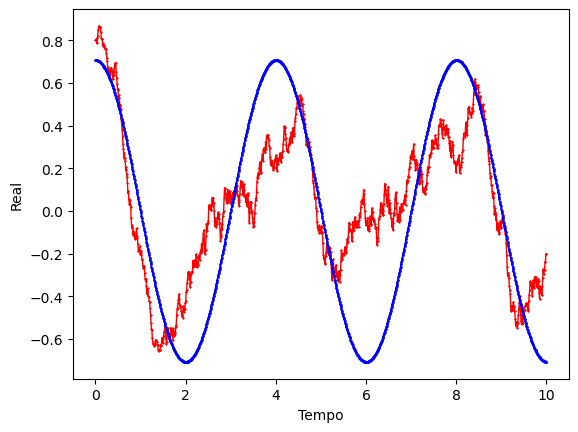

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_0.png', format='png')
plt.show()

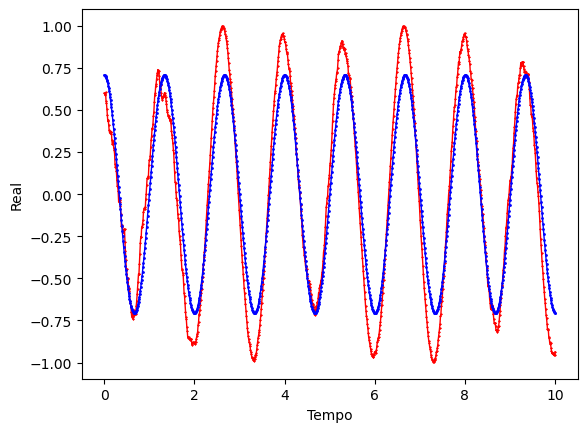

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_1.png', format='png')
plt.show()